Importando bibliotecas

In [120]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)
custom_palette = [
    "#D9ED92",  # verde claro amarelado
    "#B5E48C",  # verde claro
    "#99D98C",  # verde médio
    "#76C893",  # verde esverdeado
    "#52B69A",  # verde-água
    "#34A0A4",  # verde-azulado
    "#168AAD",  # azul esverdeado
    "#1A759F",  # azul médio
    "#1E6091",  # azul escuro
    "#184E77",  # azul bem escuro
    "#134770"   # azul mais
]

Importando base de dados Numérica

In [95]:
df = pd.read_csv("../databases/ENEM_2023_FINAL_num.csv")
display(df)

,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,INTERNET_CASA,EST_IDADE,EST_RENDA_PER_CAP,EST_CELULAR_PER_CAP,EST_COMP_PER_CAP,EST_VEICULO_PER_CAP,EST_ELE_DOM_PER_CAP
0,Masculino,Parda,Privada,510.1,483.8,484.5,492.3,520.0,EM incompleto,ES incompleto,True,19.0,2310.002500,2.250,1.000,0.500000,4.750000
1,Feminino,Branca,Estadual,583.3,474.1,564.6,599.3,660.0,EM incompleto,PG incompleto,True,18.0,1188.001000,0.900,0.400,0.000000,1.800000
2,Masculino,Branca,Privada,646.5,620.7,801.6,585.7,740.0,PG completo,PG completo,True,18.0,2475.001250,0.750,1.125,0.250000,1.500000
3,Feminino,Branca,Privada,553.4,495.1,605.8,554.6,880.0,PG incompleto,PG incompleto,True,17.0,2475.001250,1.125,0.500,0.250000,2.625000
4,Feminino,Branca,Privada,616.3,589.7,682.8,636.7,860.0,PG incompleto,PG incompleto,True,18.0,3300.001667,1.000,1.000,0.000000,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Masculino,Branca,Privada,609.1,613.6,725.2,570.7,800.0,PG completo,PG completo,True,17.0,4950.000833,0.750,0.750,0.333333,1.500000
9996,Feminino,Parda,Estadual,471.6,488.4,597.6,556.4,820.0,EF-2 incompleto,EF-2 incompleto,True,18.0,742.501250,1.125,0.500,0.250000,1.750000
9997,Feminino,Branca,Privada,579.6,616.6,674.5,627.2,580.0,ES incompleto,ES incompleto,True,18.0,1155.001250,1.125,1.125,0.500000,2.375000
9998,Feminino,Branca,Privada,609.2,595.5,625.0,611.3,620.0,Nunca estudou,PG completo,True,17.0,3135.001250,1.125,0.750,0.750000,3.125000


Definição de variáveis

In [96]:
# Notas das outras matérias para nota da redação (RLM)
X1 = df[['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC']]  # variáveis independentes
X3 = df[['NU_NOTA_CH', 'NU_NOTA_LC']]  # variáveis independentes
y = df['NU_NOTA_REDACAO'] # variável dependente

# Renda para nota (RL)
X2 = df[['EST_RENDA_PER_CAP']]  # variáveis independentes
X4 = df[['NU_NOTA_LC']]  # variáveis independentes
y1 = df['NU_NOTA_CH']
y2 = df['NU_NOTA_CN']
y3 = df['NU_NOTA_MT']
y4 = df['NU_NOTA_LC']

Ajuste do modelo (análise estatística)

In [97]:
X_const = sm.add_constant(X1)          # adiciona intercepto (a)
modelo = sm.OLS(y, X_const).fit()     # ajusta regressão (Aplica os Mínimos Quadrados Ordinários e estima os Bs)
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:19:29   Log-Likelihood:                -64098.
No. Observations:               10000   AIC:                         1.282e+05
Df Residuals:                    9995   BIC:                         1.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.4244     12.862     -5.242      0.0

In [98]:
X_const1 = sm.add_constant(X2)          
modelo1 = sm.OLS(y1, X_const1).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_CH   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1167.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):          4.15e-242
Time:                        20:19:29   Log-Likelihood:                -57441.
No. Observations:               10000   AIC:                         1.149e+05
Df Residuals:                    9998   BIC:                         1.149e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               530.1098      1.01

In [99]:
X_const2 = sm.add_constant(X2)          
modelo2 = sm.OLS(y2, X_const2).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_CN   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1642.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:19:29   Log-Likelihood:                -58086.
No. Observations:               10000   AIC:                         1.162e+05
Df Residuals:                    9998   BIC:                         1.162e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               491.8526      1.08

In [100]:
X_const3 = sm.add_constant(X2)          
modelo3 = sm.OLS(y3, X_const3).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1988.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:19:29   Log-Likelihood:                -61833.
No. Observations:               10000   AIC:                         1.237e+05
Df Residuals:                    9998   BIC:                         1.237e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               543.4945      1.57

In [101]:
X_const4 = sm.add_constant(X2)          
modelo4 = sm.OLS(y4, X_const4).fit()
print(modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_LC   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1070.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):          3.82e-223
Time:                        20:19:29   Log-Likelihood:                -55441.
No. Observations:               10000   AIC:                         1.109e+05
Df Residuals:                    9998   BIC:                         1.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               530.0386      0.82

In [102]:
X_const5 = sm.add_constant(X2)          
modelo5 = sm.OLS(y, X_const5).fit()
print(modelo5.summary())

                            OLS Regression Results                            
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     842.2
Date:                Sun, 28 Sep 2025   Prob (F-statistic):          7.58e-178
Time:                        20:19:30   Log-Likelihood:                -65549.
No. Observations:               10000   AIC:                         1.311e+05
Df Residuals:                    9998   BIC:                         1.311e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               621.7345      2.27

In [103]:
X_const6 = sm.add_constant(X3)          
modelo6 = sm.OLS(y, X_const6).fit()
print(modelo6.summary())

                            OLS Regression Results                            
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     1810.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:19:30   Log-Likelihood:                -64408.
No. Observations:               10000   AIC:                         1.288e+05
Df Residuals:                    9997   BIC:                         1.288e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.8451     12.956     -6.472      0.0

In [104]:
X_const7 = sm.add_constant(X4)          
modelo7 = sm.OLS(y, X_const7).fit()
print(modelo7.summary())

                            OLS Regression Results                            
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     2992.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:19:30   Log-Likelihood:                -64644.
No. Observations:               10000   AIC:                         1.293e+05
Df Residuals:                    9998   BIC:                         1.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.6126     13.168     -3.768      0.0

Ajuste de modelo (focado em previsão)

In [105]:
reg = LinearRegression()
reg1 = LinearRegression()
reg2 = LinearRegression()
reg3 = LinearRegression()
reg4 = LinearRegression()
reg5 = LinearRegression()
reg6 = LinearRegression()
reg7 = LinearRegression()

reg.fit(X1, y)
reg1.fit(X2, y1)
reg2.fit(X2, y2)
reg3.fit(X2, y3)
reg4.fit(X2, y4)
reg5.fit(X2, y)
reg6.fit(X3, y)
reg7.fit(X4, y)

def mostrar_resultados(reg, X, nome="Modelo"):
    print(f"Intercepto (a - {nome}):", reg.intercept_)
    print(f"Coeficientes (b - {nome}):", reg.coef_)
    
    # Montar a função linear
    termos = [f"{reg.intercept_:.3f}"]
    for i, coef in enumerate(reg.coef_):
        termos.append(f"{coef:.3f}*x{i+1}")
    funcao = " + ".join(termos)
    
    print(f"Função linear ({nome}): y = {funcao}")
    print("-" * 50)

# Usando os modelos
modelos = [
    (reg, X1, "Multivariada 1"),
    (reg1, X2, "Simples 1"),
    (reg2, X2, "Simples 2"),
    (reg3, X2, "Simples 3"),
    (reg4, X2, "Simples 4"),
    (reg5, X2, "Simples 5"),
    (reg6, X3, "Multivariada 2"),
    (reg7, X4, "Simples 6")
]

for modelo, X, nome in modelos:
    mostrar_resultados(modelo, X, nome)

Intercepto (a - Multivariada 1): -67.4244441189901
Coeficientes (b - Multivariada 1): [0.34704894 0.21584314 0.29098143 0.46893693]
Função linear (Multivariada 1): y = -67.424 + 0.347*x1 + 0.216*x2 + 0.291*x3 + 0.469*x4
--------------------------------------------------
Intercepto (a - Simples 1): 530.1098172670258
Coeficientes (b - Simples 1): [0.01065767]
Função linear (Simples 1): y = 530.110 + 0.011*x1
--------------------------------------------------
Intercepto (a - Simples 2): 491.85260001535596
Coeficientes (b - Simples 2): [0.01348344]
Função linear (Simples 2): y = 491.853 + 0.013*x1
--------------------------------------------------
Intercepto (a - Simples 3): 543.4944838870464
Coeficientes (b - Simples 3): [0.02157944]
Função linear (Simples 3): y = 543.494 + 0.022*x1
--------------------------------------------------
Intercepto (a - Simples 4): 530.0385759289235
Coeficientes (b - Simples 4): [0.00835552]
Função linear (Simples 4): y = 530.039 + 0.008*x1
-------------------

Avaliar qualidade do modelo

In [106]:
# R²
y_pred = reg.predict(X1)
y_pred1 = reg1.predict(X2)
y_pred2 = reg2.predict(X2)
y_pred3 = reg3.predict(X2)
y_pred4 = reg4.predict(X2)
y_pred5 = reg5.predict(X2)
y_pred6 = reg6.predict(X3)
y_pred7 = reg7.predict(X4)

# Erro padrão (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse1 = np.sqrt(mean_squared_error(y1, y_pred1))
rmse2 = np.sqrt(mean_squared_error(y2, y_pred2))
rmse3 = np.sqrt(mean_squared_error(y3, y_pred3))
rmse4 = np.sqrt(mean_squared_error(y4, y_pred4))
rmse5 = np.sqrt(mean_squared_error(y, y_pred5))
rmse6 = np.sqrt(mean_squared_error(y, y_pred6))
rmse7 = np.sqrt(mean_squared_error(y, y_pred7))

def R2(y, ypred, nome):
    print(f"R² ({nome}): {r2_score(y, ypred)}")

def Erro_Padrao(rmse, nome):
    print(f"RMSE ({nome}): {rmse}")


R = [
    (y, y_pred, "Multivariada 1"),
    (y, y_pred6, "Multivariada 2"),
    (y1, y_pred1,"Simples 1"),
    (y2, y_pred2,"Simples 2"),
    (y3, y_pred3, "Simples 3"),
    (y4, y_pred4, "Simples 4"),
    (y, y_pred5, "Simples 5"),
    (y, y_pred7, "Simples 6")
]


RMSEs = [
    (rmse, "Multivariada 1"),
    (rmse6, "Multivariada 2"),
    (rmse1, "Simples 1"),
    (rmse2, "Simples 2"),
    (rmse3, "Simples 3"),
    (rmse4, "Simples 4"),
    (rmse5, "Simples 5"),
    (rmse7, "Simples 6")
]

for y, ypred, nome in R:
    R2(y, ypred, nome)

print("-" * 50)

for rmse, nome in RMSEs:
    Erro_Padrao(rmse, nome)

R² (Multivariada 1): 0.31002049832743805
R² (Multivariada 2): 0.26585455074882325
R² (Simples 1): 0.1045616689411829
R² (Simples 2): 0.1410954378421443
R² (Simples 3): 0.1658818517826136
R² (Simples 4): 0.09671273333246111
R² (Simples 5): 0.07768847558197478
R² (Simples 6): 0.2303453932258842
--------------------------------------------------
RMSE (Multivariada 1): 147.0643422304596
RMSE (Multivariada 2): 151.69817150373908
RMSE (Simples 1): 75.57715952205373
RMSE (Simples 2): 80.61452068272258
RMSE (Simples 3): 117.26029536371766
RMSE (Simples 4): 61.87867709002063
RMSE (Simples 5): 170.0309996454353
RMSE (Simples 6): 155.32352106296278


Variáveis de resíduo

In [107]:
residuos = y - y_pred
residuos1 = y1 - y_pred1
residuos2 = y2 - y_pred2
residuos3 = y3 - y_pred3
residuos4 = y4 - y_pred4
residuos5 = y - y_pred5
residuos6 = y - y_pred6
residuos7 = y - y_pred7


Pressupostos do modelo

Linearidade (Y deve ter relação linear com cada X)

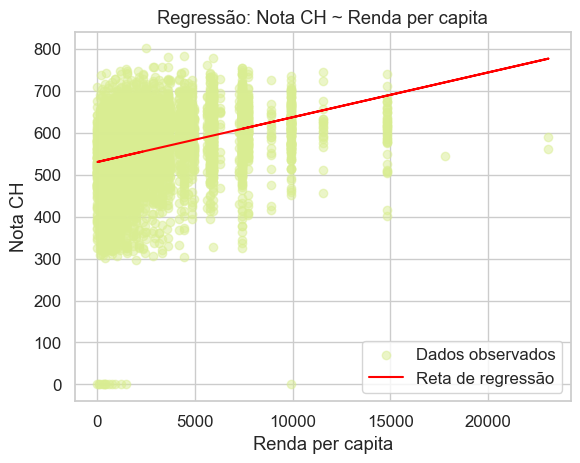

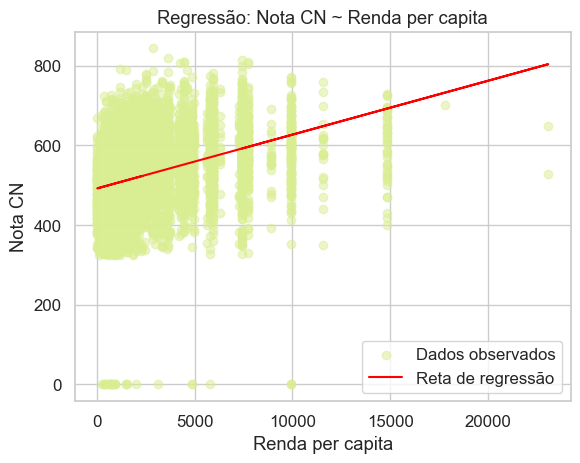

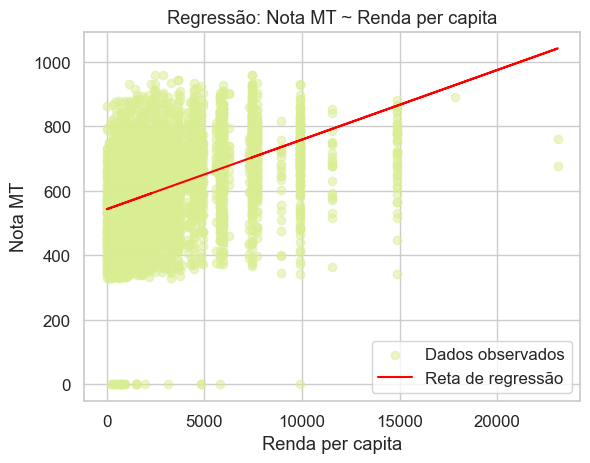

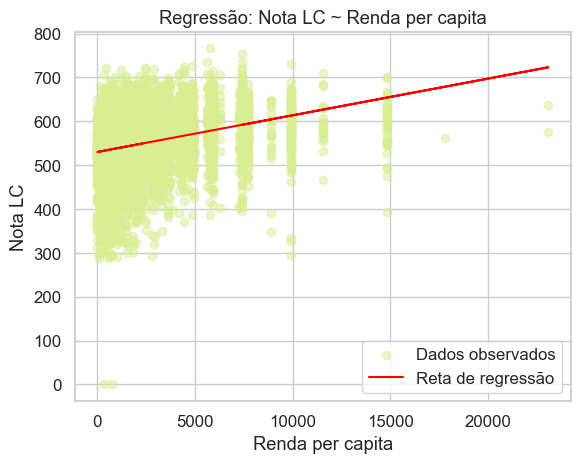

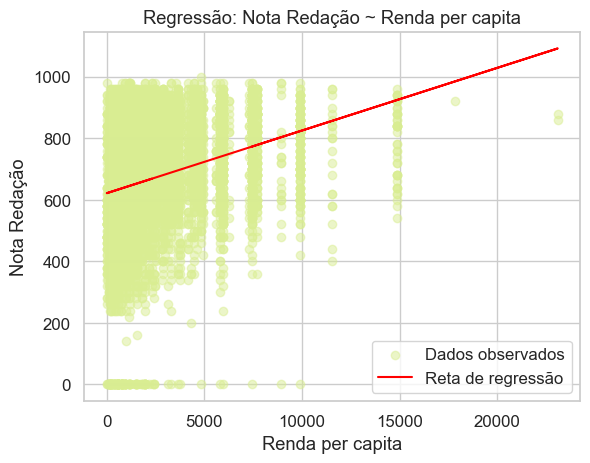

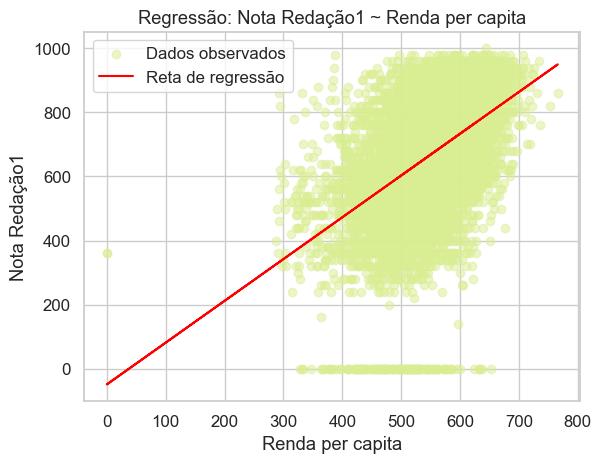

In [130]:
def plot_regressao(x, y, y_pred, nome_var):
    plt.scatter(x, y, color='#D9ED92', alpha=0.5, label='Dados observados')
    plt.plot(x, y_pred, color='red', label='Reta de regressão')
    plt.xlabel('Renda per capita')
    plt.ylabel(nome_var)
    plt.title(f'Regressão: {nome_var} ~ Renda per capita')
    plt.legend()

    plt.gca().set_facecolor("none")  # área do gráfico
    plt.gcf().patch.set_alpha(0)     # figura inteira
    plt.savefig(f"../images/Linearidade/{nome_var}.png", transparent=False, dpi=300)

    plt.show()

plot_regressao(X2, y1, y_pred1, "Nota CH")
plot_regressao(X2, y2, y_pred2, "Nota CN")
plot_regressao(X2, y3, y_pred3, "Nota MT")
plot_regressao(X2, y4, y_pred4, "Nota LC")
plot_regressao(X2, y, y_pred5, "Nota Redação")
plot_regressao(X4, y, y_pred7, "Nota Redação1")

Independência dos resíduos (erros não correlacionados)

In [109]:
dw = durbin_watson(residuos)
dw1 = durbin_watson(residuos1)
dw2 = durbin_watson(residuos2)
dw3 = durbin_watson(residuos3)
dw4 = durbin_watson(residuos4)
dw5 = durbin_watson(residuos5)
dw6 = durbin_watson(residuos6)
dw7 = durbin_watson(residuos7)

def IndepResiduos(dwn):
    print(f"Durbin-Watson: {dwn:.3f} (≈2 indica independência dos resíduos)")

IndepResiduos(dw)
IndepResiduos(dw6)

IndepResiduos(dw1)
IndepResiduos(dw2)
IndepResiduos(dw3)
IndepResiduos(dw4)
IndepResiduos(dw5)
IndepResiduos(dw7)

Durbin-Watson: 1.998 (≈2 indica independência dos resíduos)
Durbin-Watson: 1.999 (≈2 indica independência dos resíduos)
Durbin-Watson: 2.013 (≈2 indica independência dos resíduos)
Durbin-Watson: 1.996 (≈2 indica independência dos resíduos)
Durbin-Watson: 1.989 (≈2 indica independência dos resíduos)
Durbin-Watson: 1.964 (≈2 indica independência dos resíduos)
Durbin-Watson: 1.979 (≈2 indica independência dos resíduos)
Durbin-Watson: 1.989 (≈2 indica independência dos resíduos)


Homocedasticidade (resíduos devem ter variância constante e média = 0) 

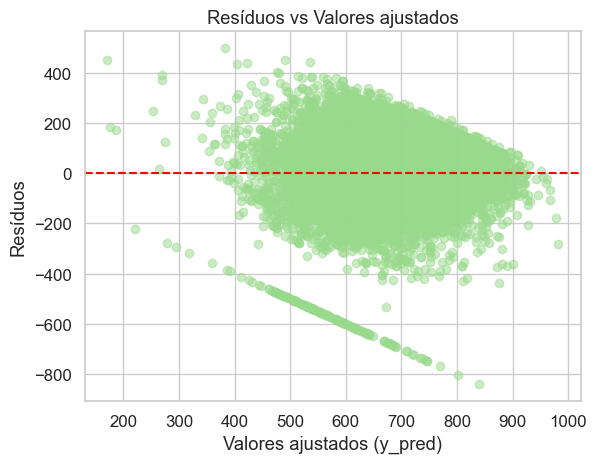

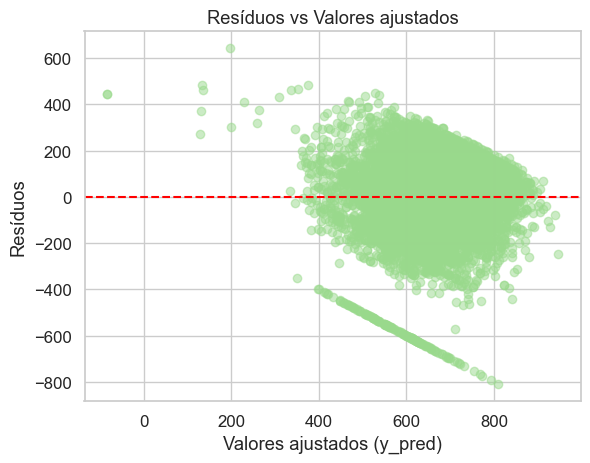

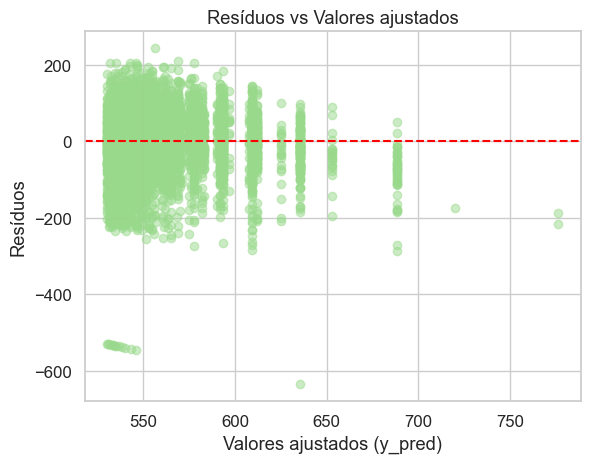

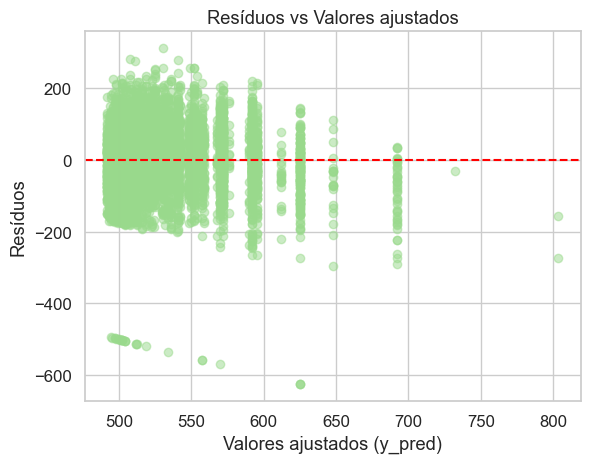

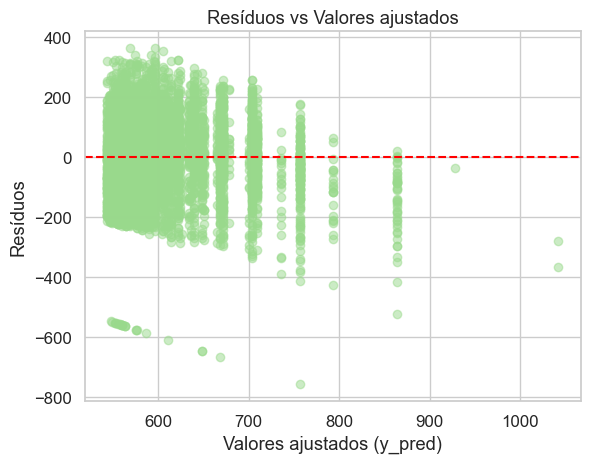

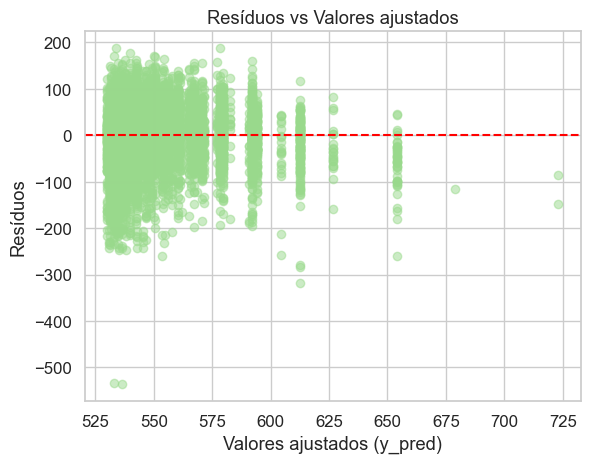

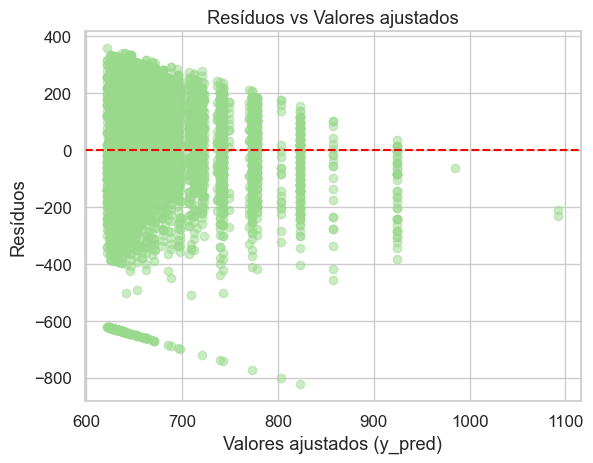

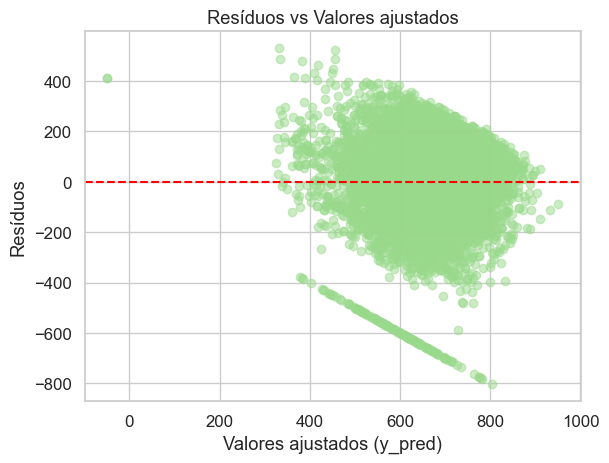

In [135]:
# A média dos resíduos precisam ser iguais a zero
def plot_residuos_zero(pred, residuo, img):
    plt.scatter(pred, residuo, color='#99D98C', alpha=0.5)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Valores ajustados (y_pred)")
    plt.ylabel("Resíduos")
    plt.title("Resíduos vs Valores ajustados")

    plt.gca().set_facecolor("none")  # área do gráfico
    plt.gcf().patch.set_alpha(0)     # figura inteira
    plt.savefig(f"../images/Homocedasticidade/{img}.png", transparent=False, dpi=300)

    plt.show()

plot_residuos_zero(y_pred, residuos, "M1")
plot_residuos_zero(y_pred6, residuos6, "M2")

plot_residuos_zero(y_pred1, residuos1, "S1")
plot_residuos_zero(y_pred2, residuos2, "S2")
plot_residuos_zero(y_pred3, residuos3, "S3")
plot_residuos_zero(y_pred4, residuos4, "S4")
plot_residuos_zero(y_pred5, residuos5, "S5")
plot_residuos_zero(y_pred7, residuos7, "S6")

Analisar resíduos (normalidade)

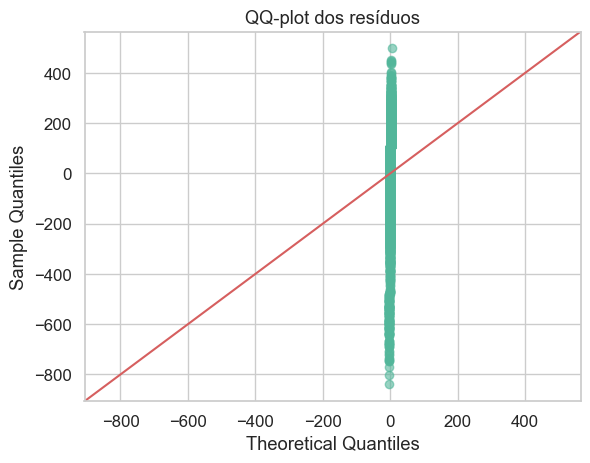

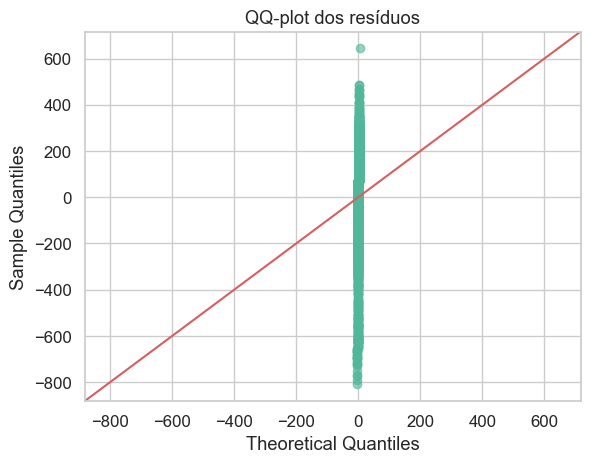

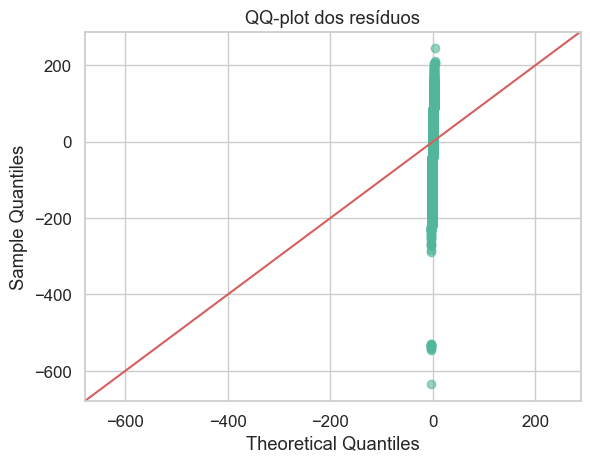

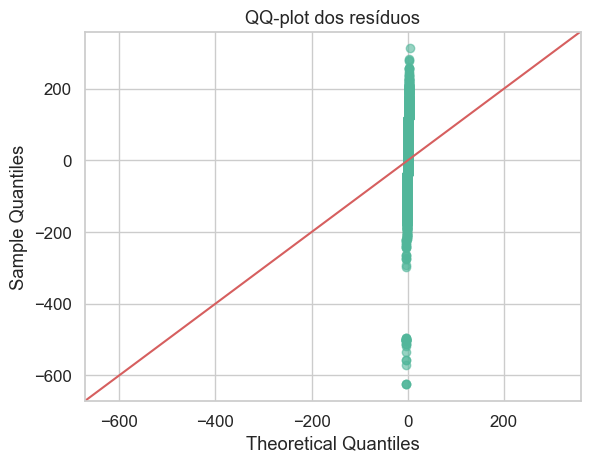

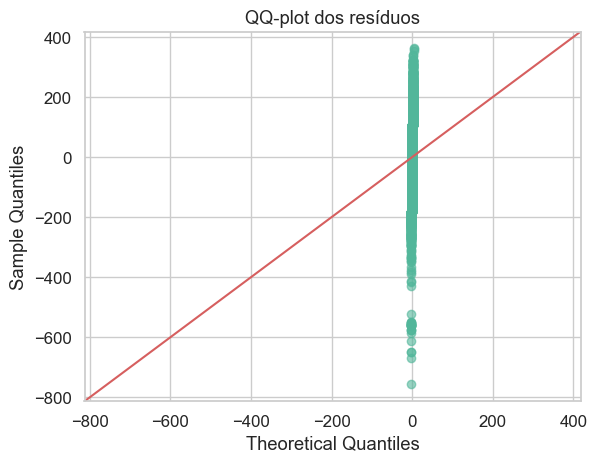

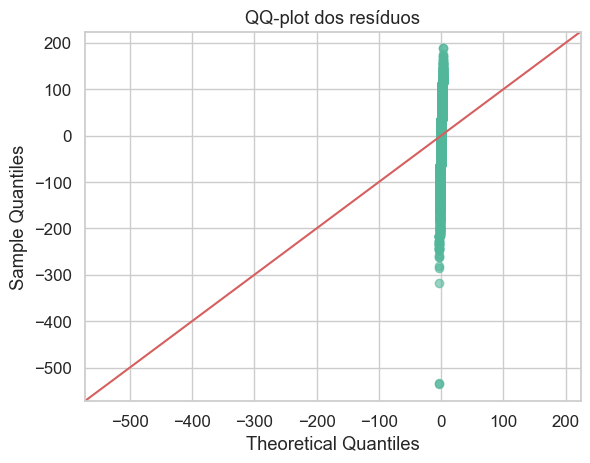

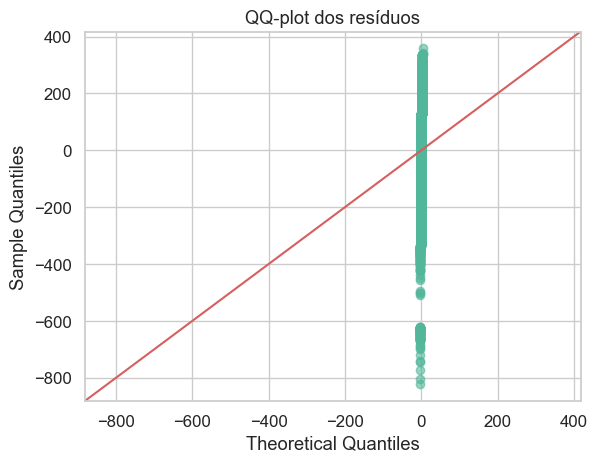

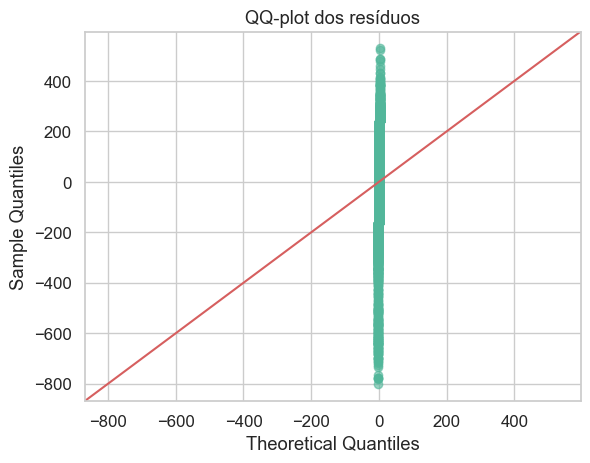

In [139]:
def plot_residuos_normal(residuo, img):
    sm.qqplot(residuo, line="45", markerfacecolor="#52B69A", markeredgecolor="#52B69A", alpha=0.6)
    plt.title("QQ-plot dos resíduos")
    plt.gca().set_facecolor("none")  # área do gráfico
    plt.gcf().patch.set_alpha(0)     # figura inteira
    plt.savefig(f"../images/ResidNormal/{img}.png", transparent=False, dpi=300)

    plt.show()

plot_residuos_normal(residuos, "M1")
plot_residuos_normal(residuos6, "M2")

plot_residuos_normal(residuos1, "S1")
plot_residuos_normal(residuos2, "S2")
plot_residuos_normal(residuos3, "S3")
plot_residuos_normal(residuos4, "S4")
plot_residuos_normal(residuos5, "S5")
plot_residuos_normal(residuos7, "S6")

Ausência de multicolinearidade (no caso da regressão múltipla)

In [112]:
vif_data = pd.DataFrame()
vif_data["Variável"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) 
                   for i in range(X1.shape[1])]

print("\nFatores de Inflação da Variância (VIF):")
print(vif_data)

vif_data1 = pd.DataFrame()
vif_data1["Variável"] = X3.columns
vif_data1["VIF"] = [variance_inflation_factor(X3.values, j) 
                   for j in range(X3.shape[1])]

print("\nFatores de Inflação da Variância (VIF):")
print(vif_data1)


Fatores de Inflação da Variância (VIF):
     Variável         VIF
0  NU_NOTA_CH  124.411023
1  NU_NOTA_CN   83.263198
2  NU_NOTA_MT   50.188260
3  NU_NOTA_LC  125.560390

Fatores de Inflação da Variância (VIF):
     Variável         VIF
0  NU_NOTA_CH  106.942719
1  NU_NOTA_LC  106.942719
